# Keras iris Modeling

# 실습용 데이터 설정
- iris.csv

In [ ]:
import seaborn as sns
iris = sns.load_dataset('iris')

- pandas DataFrame

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 1. Data Preprocessing

> ## 1) iris.Species 빈도분석

- Species : setosa, virginica, versicolor

In [ ]:
iris.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

> ## 2) DataFrame to Array & Casting

In [ ]:
iris_ar = iris.values
iris_ar

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

- object to float

In [ ]:
ar_X = iris_ar[:, 0:4].astype(float) # array 0~3열까지 float형으로 변경 뒤 ar_X로 지정
ar_y = iris_ar[:, 4]                 # array 4열만 ar_y로 지정

ar_X.shape, ar_y.shape


((150, 4), (150,))

In [ ]:
print(ar_X)
print(ar_y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

> ## 3) One Hot Encoding with sklearn & Keras

- LabelEncoder( )
   - ['setosa', 'virginica', 'virsicolor'] to [0, 1, 2]

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ar_yLBE = encoder.fit_transform(ar_y)  # ar_y를 인코딩
ar_yLBE 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

-  One Hot Encoding - to_categorical( ) 

In [ ]:
import tensorflow as tf
ar_yOHE = tf.keras.utils.to_categorical(ar_yLBE)
ar_yOHE

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

- tensoFlow Version

In [ ]:
tf.__version__

'2.4.1'

- Keras Version

In [ ]:
tf.keras.__version__

'2.4.0'

> ## 4) Train & Test Split with sklearn Package

- 7 : 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ar_X, ar_yOHE,
                                                    test_size = 0.3,
                                                    random_state = 2045)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

# Keras Modeling

> ## 1) Keras models & layers Import

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

> ## 2) Model Define

- 모델 신경망 구조 정의

In [ ]:
model_iris = models.Sequential() # Sequential 모델은 순차적으로 레이어를 더하기 때문에 순차모델이라고도 한다

model_iris.add(layers.Dense(16, activation = 'relu', input_shape = (4,))) # input_shape = 행의 개수
model_iris.add(layers.Dense(8, activation = 'relu'))
model_iris.add(layers.Dense(3, activation = 'softmax'))
# Dense 클래스로 만들어진 노드를 sequential 모델에 add하면 모델 안에 있는 다른 노드들과 연결된다


- 모델 구조 확인
   - Layers & Parameters

In [ ]:
model_iris.summary()
# 각각 레이어의 파라미터 개수(이전 입력노드개수 * 입력노드개수만큼의 가중치 + 입력노드개수만큼의 편향)가 80(4 * 16 + 16), 136(16 * 8 + 8), 27(8 * 3 + 3)개다.
# Input_layer = summary에 나오진 않았지만, sepal_width,..,petal_length로 4개이다.  
# Hidden_layer1 = 노드 16개 
# Hidden_layer2 = 노드 8개 
# Output_layer  = 노드 3개(1,0,0 / 0,1,0 / 0,0,1) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 27        
Total params: 243
Trainable params: 243
Non-trainable params: 0
_________________________________________________________________


- 모델 레이어 시각화

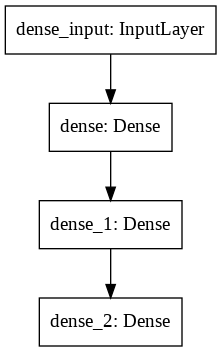

In [ ]:
from tensorflow.keras import utils
utils.plot_model(model_iris)

> ## 3) Model Compile

- 모델 학습방법 설정
   - 'adam' = Adaptive Moment Estimation
      - RMSProp과 Momentum 방식의 장점을 합친 알고리즘
      - Momentum과 같이 지금까지 계산해온 기울기의 지수평균을 저장
      - RMSProp과 같이 기울기 제곱값의 지수평균을 저장

In [ ]:
model_iris.compile(loss = 'categorical_crossentropy',
                   optimizer = 'adam',
                   metrics = ['accuracy'])
# adam 방법으로 CEE를 최소화 시키고, Accuracy를 보겠다.
# 이진분류를 하고 싶으면, loss = 'binary_crossentropy'
# 예측모델을 만들고 싶으면, loss = 'mean_squared_error'

> ## 4) Model Fit

- 모델 학습 수행

In [ ]:
history_iris = model_iris.fit(X_train, y_train,
                              epochs = 500,
                              batch_size = 7,
                              validation_data = (X_test, y_test))
## 코드 설명 ## 
# X_train = 입력값
# y_train = 입력 값들이 실제 출력되기를 바라는 값
# batch_size = 샘플 개수
# epochs = 학습 크기. 7묶음씩 500번 학습시킨다
# train data에 105개의 데이터를 7개씩 묶으면, train data 한번에 총 15번을 돌릴 수 있고, epochs = 500이니, 15번 돌린 것을 500번 반복한다. 

## 결과 ##
# loss, accuracy : train data로 학습시킨 결과 
# val_loss, val_accuracy : test data로 학습시킨 결과

Epoch 1/500
15/15 [==============================] - 1s 22ms/step - loss: 1.8386 - accuracy: 0.3265 - val_loss: 1.6394 - val_accuracy: 0.3111
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 1.3684 - accuracy: 0.2786 - val_loss: 1.2046 - val_accuracy: 0.3333
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 1.2380 - accuracy: 0.3479 - val_loss: 0.9423 - val_accuracy: 0.3111
Epoch 4/500
15/15 [==============================] - 0s 6ms/step - loss: 0.8844 - accuracy: 0.3930 - val_loss: 0.8472 - val_accuracy: 0.6889
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 0.8501 - accuracy: 0.6171 - val_loss: 0.7748 - val_accuracy: 0.6889
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7557 - accuracy: 0.6593 - val_loss: 0.7122 - val_accuracy: 0.6889
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 0.7449 - accuracy: 0.5982 - val_loss: 0.6678 - val_accuracy: 0.6889
Epoch 8/500


> ## 5) 학습 결과 시각화

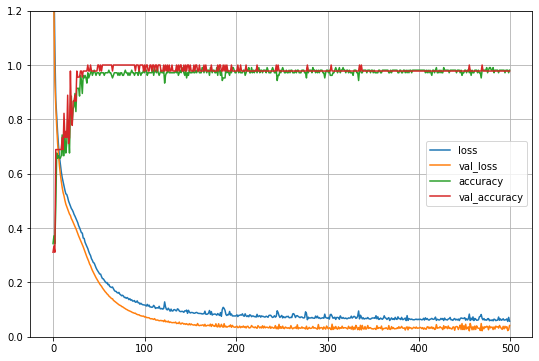

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.ylim(0, 1.2)
plt.plot(history_iris.history['loss'])
plt.plot(history_iris.history['val_loss'])
plt.plot(history_iris.history['accuracy'])
plt.plot(history_iris.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy', 'val_accuracy'])
plt.grid()
plt.show()
# 보통 train data, tets data 결과를 따로 그린다
# accuracy는 1에 가까워지고,
# loss는 0에 가까워진다
# 300번 정도만 진행해도 지금의 결과와 비슷할 듯 하다 

> ## 6) Model Evaluate

- Loss & Accuracy

In [ ]:
loss, accuracy = model_iris.evaluate(X_test, y_test)

print('Loss = {:.2f}'.format(loss))
print('Accuracy = {:.2f}'.format(accuracy))

2/2 [==============================] - 0s 7ms/step - loss: 0.0416 - accuracy: 0.9778
Loss = 0.04
Accuracy = 0.98


> ## 7) Model Predict

- Probability : 확률값

In [ ]:
import numpy as np
np.set_printoptions(suppress = True, precision = 5)
model_iris.predict(X_test)
# 한 행 결과 합 = 1

array([[0.99999, 0.00001, 0.     ],
       [0.99978, 0.00022, 0.     ],
       [0.00112, 0.99819, 0.00069],
       [0.     , 0.00006, 0.99994],
       [1.     , 0.     , 0.     ],
       [0.00011, 0.99931, 0.00058],
       [0.     , 0.00741, 0.99259],
       [1.     , 0.     , 0.     ],
       [0.     , 0.00074, 0.99926],
       [0.99999, 0.00001, 0.     ],
       [0.00002, 0.93802, 0.06195],
       [0.     , 0.00368, 0.99632],
       [0.00001, 0.99895, 0.00104],
       [1.     , 0.     , 0.     ],
       [1.     , 0.     , 0.     ],
       [0.00003, 0.99846, 0.00151],
       [0.00001, 0.99369, 0.0063 ],
       [1.     , 0.     , 0.     ],
       [0.00001, 0.99971, 0.00029],
       [1.     , 0.     , 0.     ],
       [0.99999, 0.00001, 0.     ],
       [0.99999, 0.00001, 0.     ],
       [0.     , 0.00111, 0.99889],
       [1.     , 0.     , 0.     ],
       [0.     , 0.08112, 0.91888],
       [0.     , 0.0099 , 0.9901 ],
       [1.     , 0.     , 0.     ],
       [0.     , 0.99918, 0.

- Class

In [ ]:
y_hat = model_iris.predict_classes(X_test)
y_hat
# 위의 결과를 0, 1, 2로 분류. 확률값이 가장 큰 값으로 분류한다
# 0 = [1, 0, 0]
# 1 = [0, 1, 0]
# 2 = [0, 0, 1]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Probability to Class

In [ ]:
np.argmax(model_iris.predict(X_test), axis = 1)
# 다차원 배열의 경우, 차원에 따라 가장 큰 값의 인덱스들을 반환해주는 함수
# 확률값이 가장 큰 값으로 분류한다. 위의 predict_classes와 같은 결과

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- One-Hot Encoding to Array
   - np.argmax( ) : 다차원 배열의 차원에 따라 가장 큰 값의 인덱스를 반환
   - axis = 1 : 열기준

In [ ]:
y = np.argmax(y_test, axis = 1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

- Confusion Matrix & Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y, y_hat)
# 하나 틀리게 예측

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [ ]:
print(classification_report(y, y_hat,
                            target_names = ['setosa',
                                            'virginica',
                                            'versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



# 3. Model Save & Load
두 가지 방법

> ## 1) File System

- Save to Colab File System

In [ ]:
!ls -l

total 12
-rw-r--r-- 1 root root 7979 Mar 17 07:18 model.png
drwxr-xr-x 1 root root 4096 Mar  5 14:37 sample_data


In [ ]:
model_iris.save('model_iris.h5')
!ls -l

total 48
-rw-r--r-- 1 root root 34592 Mar 17 07:27 model_iris.h5
-rw-r--r-- 1 root root  7979 Mar 17 07:18 model.png
drwxr-xr-x 1 root root  4096 Mar  5 14:37 sample_data


- Download Colab File System to Local File System

In [ ]:
from google.colab import files
files.download('model_iris.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

- Load from colab File System

In [ ]:
from keras.models import load_model
model_local = load_model('model_iris.h5')

In [ ]:
model_local.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

> ## 2) Google Drive

- Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- Check Mounted_drive

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets'

total 1740620
-rw------- 1 root root      20066 Mar  4 04:45 cat.1700.jpg
-rw------- 1 root root   69155672 Mar  4 04:46 creditCardFraud.zip
-rw------- 1 root root   90618980 Mar  4 04:51 dogs_and_cats_small.zip
drwx------ 2 root root       4096 Mar  9 04:28 image
-rw------- 1 root root    8204887 Mar  4 04:45 Images_500.zip
-rw------- 1 root root    4240457 Mar 15 04:04 Kaggle_Customer_Satisfaction.zip
-rw------- 1 root root   12929865 Mar  4 04:42 Logo_Data.zip
-rw------- 1 root root   18272469 Mar  4 04:50 MNIST.csv
-rw------- 1 root root   22824989 Mar 11 00:13 Online_Retail.zip
-rw------- 1 root root        741 Mar  4 04:44 PII.csv
-rw------- 1 root root 1141460846 Mar  4 04:50 waferImages.zip
-rw------- 1 root root  414658234 Mar  4 04:49 yolo_weight.zip


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/PII.csv')
df.head()
# 마운트 잘 됐는지 확인

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


In [ ]:
model_iris.save('/content/drive/My Drive/Colab Notebooks/models/001_model_iris.h5')

In [ ]:
!ls -l '/content/drive/My Drive/Colab Notebooks/models'

total 34
-rw------- 1 root root 34592 Mar 17 07:32 001_model_iris.h5


- Load from Mounted Google Drive Directory

In [ ]:
from keras.models import load_model
model_google = load_model('/content/drive/My Drive/Colab Notebooks/models/001_model_iris.h5')
model_google.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

###
#The End
###